In [67]:
%matplotlib inline
import socket
import time

import numpy as np




plotdata = []


HOST = "192.168.4.1"

PORT = 80

buffer =b""




hz = 0

try:
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, PORT))
        s.settimeout(1)
        ready = False
        while not ready:
            s.sendall(b'\r\n')
            try:
                _ = s.recv(1024)
                ready = True
                print('Connnected')
            except socket.timeout:
               pass
        while True:
            try:

                data = s.recv(1024)
                #if not data:
                #    print('No data')
                #    break
                buffer += data
                while b"\n" in buffer:
                    line, buffer = buffer.split(b"\n",1)
                    mes = line.decode().strip()
                    print('Data:',mes)
                    if len(mes)>0:
                        parts = mes.split(',')
                        now = int(parts[0])
                        hall = int(parts[1])
                        lasthall = int(parts[2])
                        z_acc = float(parts[5])
                        z_gyro = float(parts[8])
                        if hall != lasthall:
                            dt = np.abs(hall - lasthall)
                            hz = 1000 / dt
                        plotdata.append([now,z_acc,z_gyro,hz])
                        print(f'Frequenz: {hz:.2f} Hz', len(parts))
            except socket.timeout:
                print('Socket timeout')
                continue
except KeyboardInterrupt:
    print('keyboard interrupt')
    s.close()
except Exception as e:
    print(e)
    s.close()
finally:
    print('Finished')
    s.close()


Connnected
Data: 
Data: 4517645,4033276,4031878,-0.75,1.31,-9.48,0.02,-0.08,-0.01,-0.75,1.31,-9.48,0.02,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517681,4033276,4031878,-0.80,1.34,-9.50,0.02,-0.08,-0.01,-0.80,1.34,-9.50,0.02,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517715,4033276,4031878,-0.80,1.39,-9.46,0.01,-0.08,-0.01,-0.80,1.39,-9.46,0.01,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517753,4033276,4031878,-0.81,1.44,-9.47,0.02,-0.08,-0.01,-0.81,1.44,-9.47,0.02,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517789,4033276,4031878,-0.82,1.34,-9.49,0.03,-0.08,-0.01,-0.82,1.34,-9.49,0.03,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517825,4033276,4031878,-0.76,1.33,-9.49,0.02,-0.08,-0.01,-0.76,1.33,-9.49,0.02,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517860,4033276,4031878,-0.85,1.43,-9.47,0.01,-0.08,-0.01,-0.85,1.43,-9.47,0.01,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517895,4033276,4031878,-0.79,1.41,-9.47,0.02,-0.08,-0.01,-0.79,1.41,-9.47,0.02,-0.08,-0.01
Frequenz: 0.72 Hz 15
Data: 4517931,4033276,4031878,

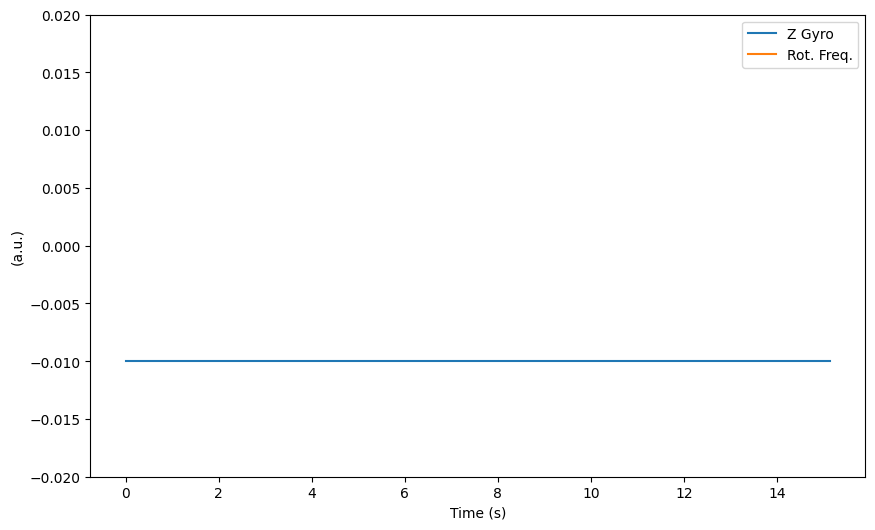

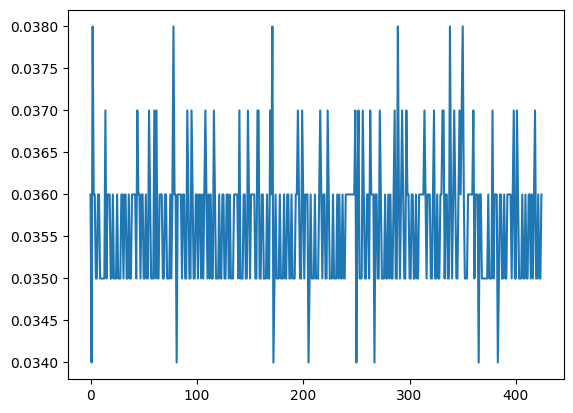

In [68]:
import matplotlib.pyplot as plt
plotdata = np.array(plotdata)
plottime = (plotdata[:,0] - plotdata[0,0])/1000

plt.figure(figsize=(10,6))
#plt.plot(plottime,plotdata[:,1], label = 'Z Acceleration')
plt.plot(plottime,plotdata[:,2], label = 'Z Gyro')
plt.plot(plottime,plotdata[:,3], label = 'Rot. Freq.')
plt.xlabel('Time (s)')
plt.ylabel('(a.u.)')
plt.legend()
plt.ylim(-0.02,0.02)
#plt.xlim(0,30)
plt.show()

len(plottime)

plt.plot(np.diff(plottime))
plt.show()


#plt.plot(plotdata[:,3],plotdata[:,2])
#plt.show()
